In [1]:
import pandas as pd

In [2]:
ms_df = pd.read_csv("Data/bbg_data.csv")
ff_df = pd.read_csv("Data/FF_data.csv")
ms_df["date"] = ms_df["Unnamed: 0"].str.replace("-", "").astype("int64")
main_df = ms_df.merge(ff_df, how="left", left_on="date", right_on="Unnamed: 0")
main_df.dropna(inplace=True)

main_df

,Unnamed: 0_x,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,...,GOOG_mcap,GOOG_return,date,Unnamed: 0_y,Mkt-RF,SMB,HML,RMW,CMA,RF
1,2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,...,3.574916e+05,-0.3021,20150102,20150102.0,-0.12,-0.57,0.08,-0.25,0.12,0.000
2,2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,...,3.503354e+05,-2.0846,20150105,20150105.0,-1.84,0.25,-0.68,0.16,-0.08,0.000
3,2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,...,3.419722e+05,-2.3177,20150106,20150106.0,-1.04,-0.78,-0.31,0.53,0.02,0.000
4,2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,...,3.411923e+05,-0.1713,20150107,20150107.0,1.19,0.17,-0.66,0.25,-0.14,0.000
5,2015-01-08,27.973,6.562169e+05,3.8422,15.023,1.391149e+05,0.6836,25.346,3.423203e+05,0.3484,...,3.423203e+05,0.3153,20150108,20150108.0,1.81,-0.10,-0.28,0.11,-0.16,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,2024-12-24,258.200,3.902905e+06,1.1478,229.050,2.408463e+06,1.7729,196.110,2.409293e+06,0.7604,...,2.409293e+06,0.8062,20241224,20241224.0,1.11,-0.12,-0.05,-0.13,-0.37,0.017
2605,2024-12-26,259.020,3.915300e+06,0.3176,227.050,2.387433e+06,-0.8732,195.600,2.403289e+06,-0.2601,...,2.403289e+06,-0.2379,20241226,20241226.0,0.02,1.09,-0.19,-0.44,0.35,0.017
2606,2024-12-27,255.590,3.863453e+06,-1.3242,223.750,2.352734e+06,-1.4534,192.760,2.367212e+06,-1.4519,...,2.367212e+06,-1.5525,20241227,20241227.0,-1.17,-0.44,0.56,0.41,0.03,0.017
2607,2024-12-30,252.200,3.812211e+06,-1.3263,221.300,2.326972e+06,-1.0950,191.240,2.349620e+06,-0.7885,...,2.349620e+06,-0.6957,20241230,20241230.0,-1.09,0.24,0.74,0.55,0.14,0.017


In [3]:
ms_tickers = ["AAPL", "AMZN", "MSFT", "NVDA", "TSLA", "GOOG", "GOOGL", "META"]
ms_return_c = [f"{ticker}_return" for ticker in ms_tickers]
ms_mcap_c = [f"{ticker}_mcap" for ticker in ms_tickers]
ms_weight_c = [f"{ticker}_weight" for ticker in ms_tickers]

main_df["ms_mcap"] = main_df[ms_mcap_c].sum(axis=1)
for ticker in ms_tickers:
    main_df[f"{ticker}_weight"] = main_df[f"{ticker}_mcap"]/main_df["ms_mcap"]
main_df["ms_ew_return"] = main_df[ms_return_c].mean(axis=1)
ms_mw_return = [] 
for _, row in main_df.iterrows():
    ms_mw_return.append(row[ms_return_c].to_numpy()@row[ms_weight_c].to_numpy())
main_df["ms_mw_return"] = ms_mw_return

main_df

,Unnamed: 0_x,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,...,AAPL_weight,AMZN_weight,MSFT_weight,NVDA_weight,TSLA_weight,GOOG_weight,GOOGL_weight,META_weight,ms_ew_return,ms_mw_return
1,2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,...,0.299402,0.066701,0.179974,0.005109,0.012840,0.166926,0.166926,0.102122,-0.228575,-0.248966
2,2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,...,0.297035,0.066694,0.182018,0.005127,0.012556,0.166996,0.166996,0.102577,-2.161050,-2.035485
3,2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,...,0.301154,0.066069,0.181837,0.005040,0.012801,0.165255,0.165255,0.102589,-1.541163,-1.350071
4,2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,...,0.303421,0.066342,0.182968,0.004994,0.012700,0.163822,0.163822,0.101932,0.353063,0.648582
5,2015-01-08,27.973,6.562169e+05,3.8422,15.023,1.391149e+05,0.6836,25.346,3.423203e+05,0.3484,...,0.308461,0.065392,0.184394,0.005074,0.012413,0.160911,0.160911,0.102445,1.802575,2.168791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,2024-12-24,258.200,3.902905e+06,1.1478,229.050,2.408463e+06,1.7729,196.110,2.409293e+06,0.7604,...,0.187198,0.115519,0.156667,0.164707,0.071176,0.115559,0.115559,0.073615,1.811588,1.433031
2605,2024-12-26,259.020,3.915300e+06,0.3176,227.050,2.387433e+06,-0.8732,195.600,2.403289e+06,-0.2601,...,0.188462,0.114919,0.156789,0.164953,0.070170,0.115682,0.115682,0.073343,-0.503137,-0.352564
2606,2024-12-27,255.590,3.863453e+06,-1.3242,223.750,2.352734e+06,-1.4534,192.760,2.367212e+06,-1.4519,...,0.189317,0.115289,0.156852,0.164420,0.067900,0.115998,0.115998,0.074226,-1.891700,-1.760766
2607,2024-12-30,252.200,3.812211e+06,-1.3263,221.300,2.326972e+06,-1.0950,191.240,2.349620e+06,-0.7885,...,0.188750,0.115213,0.156387,0.166713,0.066342,0.116334,0.116334,0.073927,-1.201137,-1.022435


In [7]:
test_df = main_df[["date", "ms_ew_return", "ms_mw_return", "Mkt-RF", "SMB", "HML", "RMW", "CMA"]].copy()
test_df.set_index("date", inplace=True)

correlation = test_df[test_df.index >= 20210601].corr()
# test_df.corr()

<Axes: >

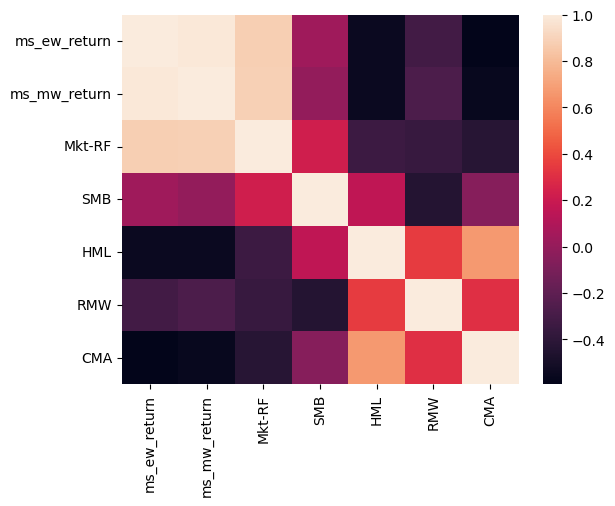

In [8]:
import seaborn as sns
sns.heatmap(correlation)